In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('athlete_events.csv', index_col=0)
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.Age

ID
1         24.0
2         23.0
3         24.0
4         34.0
5         21.0
          ... 
135569    29.0
135570    27.0
135570    27.0
135571    30.0
135571    34.0
Name: Age, Length: 271116, dtype: float64

In [4]:
df.Age.describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [5]:
df['Sport']

ID
1            Basketball
2                  Judo
3              Football
4            Tug-Of-War
5         Speed Skating
              ...      
135569             Luge
135570      Ski Jumping
135570      Ski Jumping
135571        Bobsleigh
135571        Bobsleigh
Name: Sport, Length: 271116, dtype: object

In [6]:
df['Sport'].value_counts()

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

In [8]:
df.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [9]:
df['Sport', 'Team', 'Medal'].value_counts()

KeyError: ('Sport', 'Team', 'Medal')

In [10]:
df.keys()

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [12]:
df[['Sport', 'Team', 'Medal']].value_counts()

Sport             Team           Medal 
Swimming          United States  Gold      645
Athletics         United States  Gold      537
                                 Silver    313
Basketball        United States  Gold      281
Swimming          United States  Silver    250
                                          ... 
Freestyle Skiing  China          Gold        1
                  Belarus        Silver      1
                  Austria        Silver      1
Figure Skating    West Germany   Bronze      1
Aeronautics       Switzerland    Gold        1
Length: 3574, dtype: int64

In [16]:
df[['Sport', 'Team', 'Medal']].value_counts().reset_index()

,Sport,Team,Medal,0
0,Swimming,United States,Gold,645
1,Athletics,United States,Gold,537
2,Athletics,United States,Silver,313
3,Basketball,United States,Gold,281
4,Swimming,United States,Silver,250
...,...,...,...,...
3569,Freestyle Skiing,China,Gold,1
3570,Freestyle Skiing,Belarus,Silver,1
3571,Freestyle Skiing,Austria,Silver,1
3572,Figure Skating,West Germany,Bronze,1


In [20]:
dfres = df[['Sport', 'Team', 'Medal']].value_counts().reset_index(name='Freq')

In [32]:
dfres1 = dfres.pivot_table(values='Freq', index='Team', columns=['Medal'], aggfunc='sum')

In [33]:
dfres1

Medal,Bronze,Gold,Silver
Team,,,
A North American Team,4.0,NaN,NaN
Afghanistan,2.0,NaN,NaN
Algeria,8.0,5.0,4.0
Ali-Baba II,5.0,NaN,NaN
Amateur Athletic Association,NaN,5.0,NaN
...,...,...,...
Winnipeg Shamrocks-1,NaN,12.0,NaN
Yugoslavia,93.0,130.0,167.0
Zambia,1.0,NaN,1.0


In [35]:
dfres1[dfres1.Gold > 100]

Medal,Bronze,Gold,Silver
Team,,,
Australia,511.0,342.0,453.0
Brazil,185.0,103.0,161.0
Canada,408.0,422.0,413.0
China,268.0,308.0,325.0
Cuba,116.0,164.0,127.0
Denmark,162.0,168.0,223.0
East Germany,263.0,369.0,309.0
Finland,415.0,198.0,263.0
France,577.0,455.0,518.0


<AxesSubplot:ylabel='Sport'>

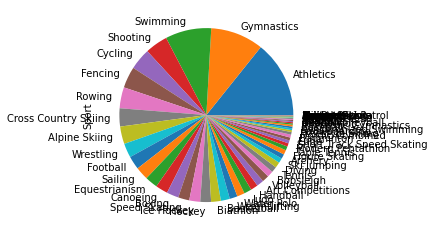

In [36]:
df['Sport'].value_counts().plot(kind='pie')

<AxesSubplot:>

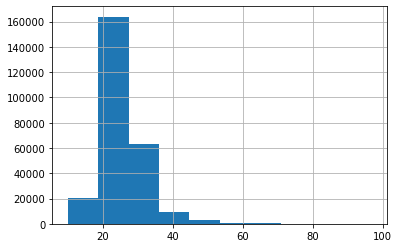

In [37]:
df.Age.hist()

In [45]:
masc= df.Age>80

In [46]:
masc

ID
1         False
2         False
3         False
4         False
5         False
          ...  
135569    False
135570    False
135570    False
135571    False
135571    False
Name: Age, Length: 271116, dtype: bool

In [47]:
df[masc]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
77710,Robert Tait McKenzie,M,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
118789,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN
128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [44]:
masc

ID
1         False
2         False
3         False
4         False
5         False
          ...  
135569    False
135570    False
135570    False
135571    False
135571    False
Name: Age, Length: 271116, dtype: bool

In [50]:
mask = df.Year>2012

In [51]:
df[mask]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,NaN
135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [52]:
mask_season = df.Season == 'Summer'

In [53]:
df[mask & mask_season]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135528,Marc Zwiebler,M,32.0,181.0,75.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Singles,NaN
135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN
135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,NaN


In [23]:
df[df.Year>2012]['Sport']

ID
16           Ice Hockey
22        Weightlifting
51           Gymnastics
51           Gymnastics
51           Gymnastics
              ...      
135547        Athletics
135547        Athletics
135568       Basketball
135570      Ski Jumping
135570      Ski Jumping
Name: Sport, Length: 18579, dtype: object

In [24]:
df[df.Year>2012]['Sport'].value_counts()

Athletics                    2508
Swimming                     1568
Gymnastics                    861
Cross Country Skiing          765
Biathlon                      726
Alpine Skiing                 687
Cycling                       667
Shooting                      555
Rowing                        550
Football                      473
Ice Hockey                    443
Canoeing                      441
Hockey                        390
Judo                          389
Sailing                       380
Speed Skating                 368
Equestrianism                 355
Handball                      353
Wrestling                     346
Fencing                       346
Snowboarding                  308
Rugby Sevens                  299
Tennis                        286
Boxing                        283
Volleyball                    283
Basketball                    281
Short Track Speed Skating     269
Freestyle Skiing              264
Water Polo                    258
Weightlifting 

In [55]:
df2016 = df[df.Year==2016]

In [60]:
df2016[['Sport', 'Team']].value_counts()

Sport      Team               
Athletics  United States          146
Swimming   United States           99
Athletics  Germany                 93
           Great Britain           86
Swimming   Australia               83
                                 ... 
Judo       Trinidad and Tobago      1
           Uruguay                  1
           Vanuatu                  1
           Venezuela                1
Wrestling  Vietnam                  1
Length: 1933, dtype: int64

In [66]:
dfres = df2016[['Sport', 'Team']].value_counts().reset_index(name='Freq')

In [69]:
dfres1 = dfres.pivot_table(values='Freq', index='Team', columns='Sport')

In [78]:
mask = dfres1.isna().sum(axis=1) <2

In [79]:
dfres1[mask]

Sport,Archery,Athletics,Badminton,Basketball,Beach Volleyball,Boxing,Canoeing,Cycling,Diving,Equestrianism,...,Synchronized Swimming,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Volleyball,Water Polo,Weightlifting,Wrestling
Team,,,,,,,,,,,,,,,,,,,,,
Brazil,12.0,72.0,2.0,23.0,NaN,9.0,18.0,10.0,12.0,24.0,...,11.0,10.0,4.0,7.0,1.0,2.0,24.0,26.0,5.0,5.0


In [80]:
mask = dfres1.isna().sum(axis=1) < 3

In [81]:
dfres1[mask]

Sport,Archery,Athletics,Badminton,Basketball,Beach Volleyball,Boxing,Canoeing,Cycling,Diving,Equestrianism,...,Synchronized Swimming,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Volleyball,Water Polo,Weightlifting,Wrestling
Team,,,,,,,,,,,,,,,,,,,,,
Brazil,12.0,72.0,2.0,23.0,NaN,9.0,18.0,10.0,12.0,24.0,...,11.0,10.0,4.0,7.0,1.0,2.0,24.0,26.0,5.0,5.0
China,12.0,57.0,4.0,24.0,2.0,11.0,12.0,18.0,16.0,1.0,...,11.0,10.0,4.0,4.0,4.0,2.0,12.0,13.0,10.0,13.0
France,6.0,51.0,2.0,24.0,NaN,10.0,22.0,33.0,3.0,24.0,...,2.0,6.0,4.0,9.0,2.0,5.0,10.0,12.0,5.0,2.0
Japan,7.0,58.0,9.0,12.0,NaN,2.0,5.0,11.0,3.0,18.0,...,10.0,10.0,1.0,7.0,3.0,4.0,12.0,12.0,7.0,10.0
United States,7.0,146.0,8.0,24.0,NaN,8.0,7.0,25.0,14.0,24.0,...,2.0,10.0,4.0,8.0,2.0,6.0,24.0,26.0,4.0,14.0


In [86]:
mask = dfres1.isna().sum(axis=1) < 5

In [87]:
dfres1[mask]

Sport,Archery,Athletics,Badminton,Basketball,Beach Volleyball,Boxing,Canoeing,Cycling,Diving,Equestrianism,...,Synchronized Swimming,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Volleyball,Water Polo,Weightlifting,Wrestling
Team,,,,,,,,,,,,,,,,,,,,,
Australia,7.0,65.0,5.0,24.0,NaN,3.0,20.0,43.0,10.0,24.0,...,11.0,10.0,4.0,10.0,1.0,6.0,NaN,26.0,2.0,3.0
Brazil,12.0,72.0,2.0,23.0,NaN,9.0,18.0,10.0,12.0,24.0,...,11.0,10.0,4.0,7.0,1.0,2.0,24.0,26.0,5.0,5.0
Canada,2.0,78.0,2.0,12.0,NaN,3.0,16.0,27.0,11.0,18.0,...,2.0,2.0,1.0,6.0,2.0,5.0,12.0,NaN,2.0,8.0
China,12.0,57.0,4.0,24.0,2.0,11.0,12.0,18.0,16.0,1.0,...,11.0,10.0,4.0,4.0,4.0,2.0,12.0,13.0,10.0,13.0
France,6.0,51.0,2.0,24.0,NaN,10.0,22.0,33.0,3.0,24.0,...,2.0,6.0,4.0,9.0,2.0,5.0,10.0,12.0,5.0,2.0
Japan,7.0,58.0,9.0,12.0,NaN,2.0,5.0,11.0,3.0,18.0,...,10.0,10.0,1.0,7.0,3.0,4.0,12.0,12.0,7.0,10.0
United States,7.0,146.0,8.0,24.0,NaN,8.0,7.0,25.0,14.0,24.0,...,2.0,10.0,4.0,8.0,2.0,6.0,24.0,26.0,4.0,14.0


In [92]:
mask = dfres1.isna().sum(axis=1) < 9

In [93]:
dfres1[mask]

Sport,Archery,Athletics,Badminton,Basketball,Beach Volleyball,Boxing,Canoeing,Cycling,Diving,Equestrianism,...,Synchronized Swimming,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Volleyball,Water Polo,Weightlifting,Wrestling
Team,,,,,,,,,,,,,,,,,,,,,
Argentina,NaN,13.0,NaN,12.0,2.0,6.0,11.0,7.0,NaN,8.0,...,2.0,NaN,NaN,4.0,NaN,2.0,24.0,NaN,1.0,1.0
Australia,7.0,65.0,5.0,24.0,NaN,3.0,20.0,43.0,10.0,24.0,...,11.0,10.0,4.0,10.0,1.0,6.0,NaN,26.0,2.0,3.0
Brazil,12.0,72.0,2.0,23.0,NaN,9.0,18.0,10.0,12.0,24.0,...,11.0,10.0,4.0,7.0,1.0,2.0,24.0,26.0,5.0,5.0
Canada,2.0,78.0,2.0,12.0,NaN,3.0,16.0,27.0,11.0,18.0,...,2.0,2.0,1.0,6.0,2.0,5.0,12.0,NaN,2.0,8.0
China,12.0,57.0,4.0,24.0,2.0,11.0,12.0,18.0,16.0,1.0,...,11.0,10.0,4.0,4.0,4.0,2.0,12.0,13.0,10.0,13.0
France,6.0,51.0,2.0,24.0,NaN,10.0,22.0,33.0,3.0,24.0,...,2.0,6.0,4.0,9.0,2.0,5.0,10.0,12.0,5.0,2.0
Germany,2.0,93.0,8.0,NaN,2.0,6.0,27.0,42.0,14.0,24.0,...,NaN,10.0,2.0,7.0,1.0,2.0,NaN,NaN,5.0,7.0
Great Britain,2.0,86.0,8.0,NaN,NaN,12.0,16.0,34.0,15.0,24.0,...,2.0,5.0,4.0,6.0,3.0,6.0,NaN,NaN,2.0,NaN
Italy,12.0,40.0,1.0,NaN,2.0,7.0,14.0,26.0,10.0,10.0,...,11.0,NaN,NaN,13.0,NaN,4.0,24.0,26.0,2.0,2.0


In [94]:
dfres1.index == 'Spain'

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Argentina-1',
       'Argentina-2',
       ...
       'United States-1', 'United States-2', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Team', length=249)

In [95]:
dfres2 = dfres1[mask]

In [101]:
mask_na = dfres2.isna().loc['Spain',:]

In [102]:
dfres2.loc['Spain', mask_na]

Sport
Diving              NaN
Fencing             NaN
Football            NaN
Modern Pentathlon   NaN
Trampolining        NaN
Volleyball          NaN
Name: Spain, dtype: float64

In [61]:
año=df['Year']==2012

In [62]:
df[año]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN
48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,NaN
67,Mariya Vasilyevna Abakumova (-Tarabina),F,26.0,179.0,80.0,Russia,RUS,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Javelin Throw,NaN
73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135526,Dniel Zwickl,M,27.0,178.0,71.0,Hungary,HUN,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Men's Singles,NaN
135528,Marc Zwiebler,M,28.0,181.0,75.0,Germany,GER,2012 Summer,2012,Summer,London,Badminton,Badminton Men's Singles,NaN
135547,Viktoriya Viktorovna Zyabkina,F,19.0,174.0,62.0,Kazakhstan,KAZ,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 200 metres,NaN


In [63]:
df[df.Year == 2012]['Age'].mean()

25.96137770897833

In [64]:
df[df.Year==2012]['Weight'].mean()

71.31958598726115

In [5]:
df.groupby('Year')['Age'].mean()

Year
1896    23.580645
1900    29.034031
1904    26.698150
1906    27.125253
1908    26.970228
1912    27.538620
1920    29.290978
1924    28.373325
1928    29.112557
1932    32.582080
1936    27.530328
1948    28.783947
1952    26.161546
1956    25.926674
1960    25.168848
1964    24.944397
1968    24.248046
1972    24.308607
1976    23.841818
1980    23.694743
1984    23.898347
1988    24.079432
1992    24.318895
1994    24.422103
1996    24.915045
1998    25.163197
2000    25.422504
2002    25.916281
2004    25.639515
2006    25.959151
2008    25.734118
2010    26.124262
2012    25.961378
2014    25.987324
2016    26.207919
Name: Age, dtype: float64

In [103]:
df.groupby('Year', 'Team')['Age'].mean()

ValueError: No axis named Team for object type DataFrame

In [104]:
df.groupby(by='Year', axis='Team')['Age'].mean()

ValueError: No axis named Team for object type DataFrame

In [106]:
df.groupby(by=['Team'])['Age'].mean()

Team
30. Februar              33.500000
A North American Team    41.333333
Acipactli                47.333333
Acturus                  27.000000
Afghanistan              23.538462
                           ...    
Zambia                   23.461039
Zefyros                  35.500000
Zimbabwe                 25.166124
Zut                      32.000000
rn-2                     29.200000
Name: Age, Length: 1184, dtype: float64

In [106]:
df.groupby('Team', 'Year')['Age'].mean()

Team
30. Februar              33.500000
A North American Team    41.333333
Acipactli                47.333333
Acturus                  27.000000
Afghanistan              23.538462
                           ...    
Zambia                   23.461039
Zefyros                  35.500000
Zimbabwe                 25.166124
Zut                      32.000000
rn-2                     29.200000
Name: Age, Length: 1184, dtype: float64

In [107]:
df.groupby(['Team'])['Age'].mean()

Team
30. Februar              33.500000
A North American Team    41.333333
Acipactli                47.333333
Acturus                  27.000000
Afghanistan              23.538462
                           ...    
Zambia                   23.461039
Zefyros                  35.500000
Zimbabwe                 25.166124
Zut                      32.000000
rn-2                     29.200000
Name: Age, Length: 1184, dtype: float64

In [105]:
df.groupby(by=['Year', 'Team'])['Age'].mean()

Year  Team                         
1896  Australia                        22.000000
      Australia/Great Britain          22.500000
      Austria                          21.750000
      Denmark                          25.933333
      Ethnikos Gymnastikos Syllogos    10.000000
                                         ...    
2016  Venezuela                        27.476190
      Vietnam                          26.892857
      Yemen                            19.333333
      Zambia                           24.142857
      Zimbabwe                         27.483871
Name: Age, Length: 5170, dtype: float64

In [6]:
df.groupby('Team')['Age'].mean()

Team
30. Februar              33.500000
A North American Team    41.333333
Acipactli                47.333333
Acturus                  27.000000
Afghanistan              23.538462
                           ...    
Zambia                   23.461039
Zefyros                  35.500000
Zimbabwe                 25.166124
Zut                      32.000000
rn-2                     29.200000
Name: Age, Length: 1184, dtype: float64

In [7]:
df.groupby('NOC')['Age'].mean()

NOC
AFG    23.538462
AHO    26.589744
ALB    25.342857
ALG    24.370642
AND    23.065089
         ...    
YEM    21.093750
YMD    23.600000
YUG    24.745721
ZAM    23.461039
ZIM    25.200647
Name: Age, Length: 230, dtype: float64

In [8]:
df.groupby('Sex')['Age'].mean()

Sex
F    23.732881
M    26.277562
Name: Age, dtype: float64

In [9]:
df.groupby('City')['Age'].mean()

City
Albertville               24.027948
Amsterdam                 29.414907
Antwerpen                 29.290978
Athina                    25.709420
Atlanta                   24.915045
Barcelona                 24.396165
Beijing                   25.734118
Berlin                    27.878331
Calgary                   23.840607
Chamonix                  27.590571
Cortina d'Ampezzo         25.549922
Garmisch-Partenkirchen    25.048643
Grenoble                  24.215812
Helsinki                  26.258851
Innsbruck                 24.071646
Lake Placid               23.956123
Lillehammer               24.422103
London                    26.930551
Los Angeles               26.114516
Melbourne                 25.523731
Mexico City               24.255154
Montreal                  23.863837
Moskva                    23.704354
Munich                    24.341103
Nagano                    25.163197
Oslo                      25.446691
Paris                     28.575935
Rio de Janeiro         